In [8]:
'''# connecting to drive to get the data
from google.colab import drive
drive.mount('/content/drive')'''

"# connecting to drive to get the data\nfrom google.colab import drive\ndrive.mount('/content/drive')"

In [6]:
pip install patool


In [1]:
# importing important libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [7]:
'''import patoolib

patoolib.extract_archive('/content/drive/My Drive/X-ray.rar', outdir="/")

'''



'import patoolib\n\npatoolib.extract_archive(\'/content/drive/My Drive/X-ray.rar\', outdir="/")\n\n'

In [31]:
import os
covid_dir = os.path.join('/xdata/COVID')
normal_dir = os.path.join('/xdata/NORMAL')
pneumonia_dir = os.path.join('/xdata/PNEUMONIA')

print('total training covid images:', len(os.listdir(covid_dir)))
print('total training normal images:', len(os.listdir(normal_dir)))
print('total training pneumonia images:', len(os.listdir(pneumonia_dir)))

rock_files = os.listdir(covid_dir)
print(rock_files[:10])

paper_files = os.listdir(normal_dir)
print(paper_files[:10])

scissors_files = os.listdir(pneumonia_dir)
print(scissors_files[:10])

total training covid images: 4044
total training normal images: 3941
total training pneumonia images: 4273
['person1077_virus_1787.jpeg', 'person403_virus_803.jpeg', 'covid (7).png', 'COVID-19 (614).jpg', 'person826_virus_1462.jpeg', 'COVID-19 (332).jpg', 'person456_virus_943.jpeg', 'person1455_virus_2487.jpeg', 'person1363_virus_2346.jpeg', 'c08a4f41.png']
['NORMAL2-IM-0780-0001.jpeg', 'Non-COVID-19 (322).jpg', 'NORMAL2-IM-1261-0001.jpeg', 'Non-COVID-19 (5).jpeg', 'IM-0533-0001.jpeg', 'IM-0574-0001.jpeg', 'Non-COVID-19 (615).jpeg', 'Non-COVID-19 (808).jpeg', 'Non-COVID-19 (193).jpeg', 'Non-COVID-19 (251).jpg']
['person1077_virus_1787.jpeg', 'person403_virus_803.jpeg', 'person29_bacteria_144.jpeg', 'person826_virus_1462.jpeg', 'person75_bacteria_367.jpeg', 'person426_bacteria_1862.jpeg', 'person456_virus_943.jpeg', 'person1455_virus_2487.jpeg', 'person141_bacteria_670.jpeg', 'person1363_virus_2346.jpeg']


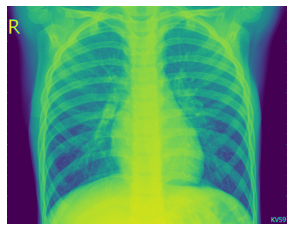

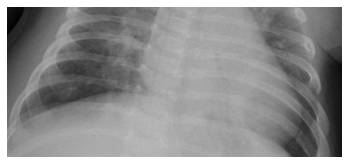

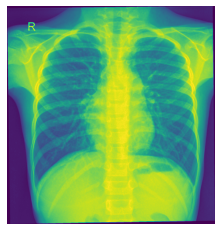

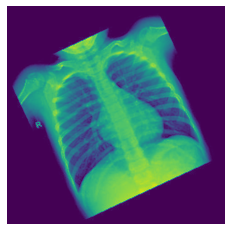

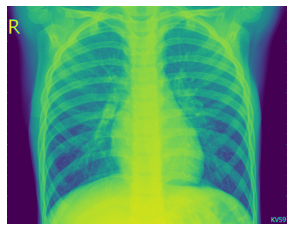

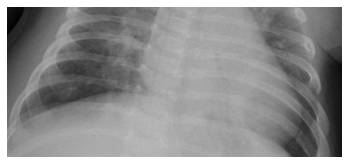

In [32]:
%matplotlib inline
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(covid_dir, fname) 
                for fname in rock_files[pic_index-2:pic_index]]
                
next_paper = [os.path.join(normal_dir, fname) 
                for fname in paper_files[pic_index-2:pic_index]]

next_scissors = [os.path.join(pneumonia_dir, fname) 
                for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock+next_paper+next_scissors):
  #print(img_path)
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

In [33]:
# Loading the data from the directory of train and test

TRAINING_DIR = '/xdata/' 
train_datagen = ImageDataGenerator( rescale=1.0/255 ) 


# TRAIN GENERATOR.
train_generator = train_datagen.flow_from_directory(
                                              TRAINING_DIR , target_size=(224, 224),  
                                              batch_size=126,
                                              class_mode='categorical') 



VALIDATION_DIR = "/content/drive/My Drive/datasets/train/"
validation_datagen = ImageDataGenerator(rescale = 1./255)


validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size=126
)



TEST_DIR = '/content/drive/My Drive/datasets/test/' 
test_datagen = ImageDataGenerator( rescale=1.0/255 ) 


# TEST GENERATOR.
test_generator = test_datagen.flow_from_directory(
                                              TEST_DIR , target_size=(224, 224),
                                              class_mode='categorical') 

Found 12251 images belonging to 3 classes.
Found 270 images belonging to 3 classes.
Found 326 images belonging to 3 classes.


[1. 0. 0.]


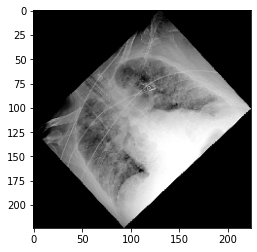

[1. 0. 0.]


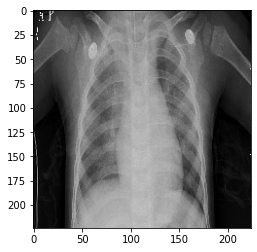

[0. 0. 1.]


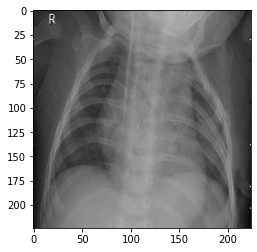

[0. 0. 1.]


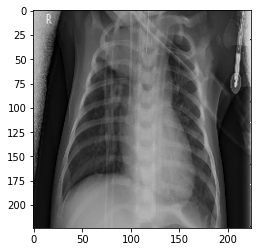

[0. 1. 0.]


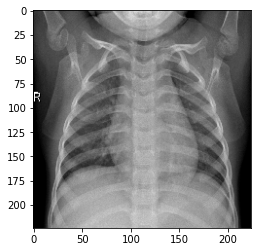

[0. 1. 0.]


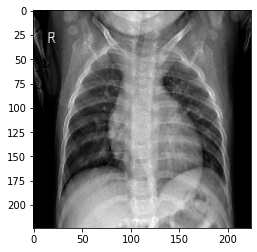

[0. 1. 0.]


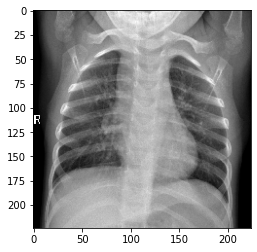

[1. 0. 0.]


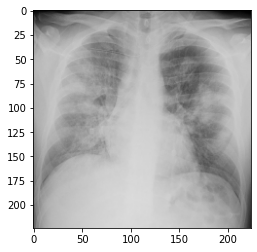

[0. 1. 0.]


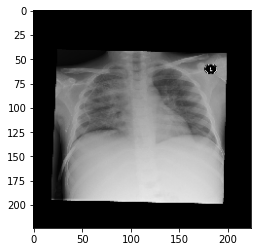

[0. 0. 1.]


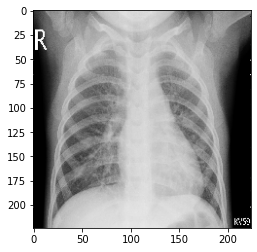

In [45]:
# to visualize the data in the generators

x_batch, y_batch = next(train_generator) 
for i in range (0,10):
    image = x_batch[i]
    plt.imshow(image)
    print(y_batch[i])
    plt.show()

In [15]:

from tensorflow.keras.applications.inception_v3 import InceptionV3
pre_trained_model = InceptionV3(input_shape = (224, 224 , 3), include_top = False , pooling='avg' , weights = 'imagenet' )
pre_trained_model.trainable = False


87916544/87910968 [==============================] - 55s 1us/step


In [16]:
model=tf.keras.Sequential([
                           pre_trained_model,
                           tf.keras.layers.Dense( 1028, activation='relu') ,
                           tf.keras.layers.Dropout(0.3) ,
                           tf.keras.layers.Dense(3,  activation='softmax')
])

#opt=tf.keras.optimizers.RMSprop( 0.001 , momentum=0.9)
opt=tf.keras.optimizers.SGD( 0.001,0.9 )
model.compile(optimizer=opt , loss = 'categorical_crossentropy', 
              metrics = ['accuracy'] )
model.summary()
cb=tf.keras.callbacks.ModelCheckpoint(
                                      f'checkpoint_test' , monitor='val_loss', verbose=0, save_best_only=True,
                                      save_weights_only=False, mode='auto', save_freq='epoch' )

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 2048)              21802784  
_________________________________________________________________
dense (Dense)                (None, 1028)              2106372   
_________________________________________________________________
dropout (Dropout)            (None, 1028)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3087      
Total params: 23,912,243
Trainable params: 2,109,459
Non-trainable params: 21,802,784
_________________________________________________________________


In [74]:
history = model.fit(train_generator, validation_data= validation_generator ,
                    epochs = 25, shuffle=True, workers=-1,
                    verbose = 1,callbacks=cb)
'''history = model.fit(
              x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,
                  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,
                  sample_weight=None, initial_epoch=0, steps_per_epoch=None,
                  validation_steps=None, validation_batch_size=None, validation_freq=1,
                  max_queue_size=10, workers=1, use_multiprocessing=False )'''

Epoch 1/25
98/98 [==============================] - 248s 3s/step - loss: 0.8692 - accuracy: 0.6113 - val_loss: 0.6067 - val_accuracy: 0.7296
Epoch 2/25
98/98 [==============================] - 245s 2s/step - loss: 0.7022 - accuracy: 0.7100 - val_loss: 0.4988 - val_accuracy: 0.8333
Epoch 3/25
98/98 [==============================] - 244s 2s/step - loss: 0.6569 - accuracy: 0.7246 - val_loss: 0.4839 - val_accuracy: 0.8370
Epoch 4/25
98/98 [==============================] - 197s 2s/step - loss: 0.6271 - accuracy: 0.7387 - val_loss: 0.5288 - val_accuracy: 0.7963
Epoch 5/25
98/98 [==============================] - 193s 2s/step - loss: 0.6090 - accuracy: 0.7479 - val_loss: 0.4863 - val_accuracy: 0.8259
Epoch 6/25
98/98 [==============================] - 237s 2s/step - loss: 0.5953 - accuracy: 0.7506 - val_loss: 0.4718 - val_accuracy: 0.8222
Epoch 7/25
98/98 [==============================] - 192s 2s/step - loss: 0.5792 - accuracy: 0.7588 - val_loss: 0.4834 - val_accuracy: 0.8222
Epoch 8/25
98

'history = model.fit(\n              x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None,\n                  validation_split=0.0, validation_data=None, shuffle=True, class_weight=None,\n                  sample_weight=None, initial_epoch=0, steps_per_epoch=None,\n                  validation_steps=None, validation_batch_size=None, validation_freq=1,\n                  max_queue_size=10, workers=1, use_multiprocessing=False )'

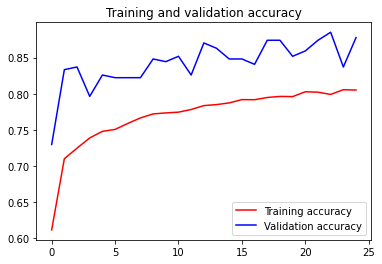

<Figure size 432x288 with 0 Axes>

In [75]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [76]:
export_dir='model_test_SGD'
tf.saved_model.save( model , export_dir)

INFO:tensorflow:Assets written to: model_test_SGD/assets


In [101]:
#!zip -r model_SGD.zip 'model_test_SGD'
#Download files
#files.download('model_SGD.zip')

In [10]:
predictions=history.predict()


AttributeError: '_UserObject' object has no attribute 'predict'

In [98]:
[i for i in predictions[0:10]]

[array([0.7543465 , 0.20023799, 0.04541554], dtype=float32),
 array([0.9147036 , 0.06851491, 0.01678144], dtype=float32),
 array([0.8593371 , 0.09727313, 0.04338976], dtype=float32),
 array([0.14633977, 0.7450302 , 0.10863006], dtype=float32),
 array([0.00558608, 0.98728484, 0.00712905], dtype=float32),
 array([0.9367711 , 0.05370068, 0.00952827], dtype=float32),
 array([0.01160657, 0.9672135 , 0.02118001], dtype=float32),
 array([0.00552831, 0.9856917 , 0.00877997], dtype=float32),
 array([0.48645583, 0.4941768 , 0.01936738], dtype=float32),
 array([9.9714249e-01, 7.5638626e-04, 2.1011271e-03], dtype=float32)]

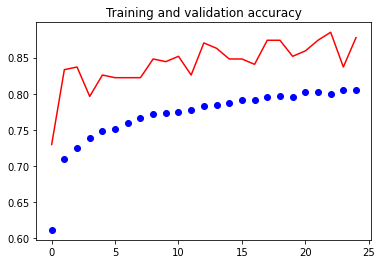

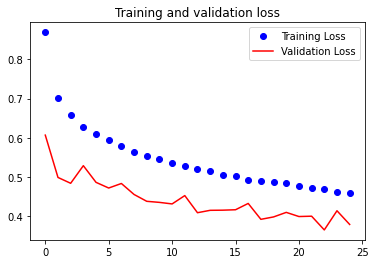

In [80]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [3]:
# LOADING THE MODEL
history=tf.keras.models.load_model('model_InceptionV3_sgd')

In [4]:
history.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         multiple                  21802784  
_________________________________________________________________
dense_42 (Dense)             multiple                  2106372   
_________________________________________________________________
dropout_28 (Dropout)         multiple                  0         
_________________________________________________________________
dense_43 (Dense)             multiple                  3087      
Total params: 23,912,243
Trainable params: 2,109,459
Non-trainable params: 21,802,784
_________________________________________________________________


Found 15 images belonging to 3 classes.
prediction = Covid
folder= covid


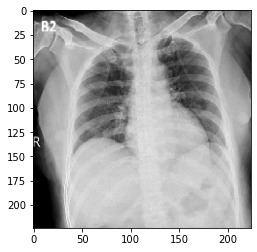

prediction = Covid
folder= covid


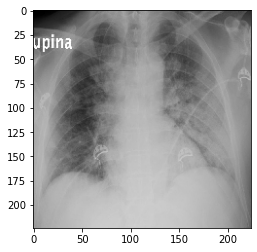

prediction = Covid
folder= covid


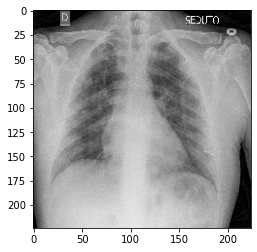

prediction = Covid
folder= covid


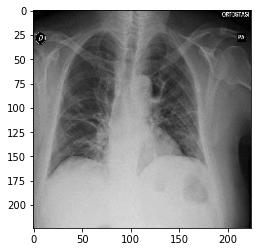

prediction = Covid
folder= covid


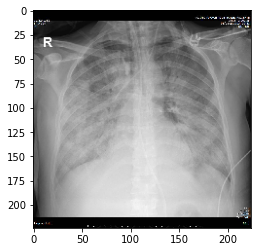

prediction = Covid
folder= covid


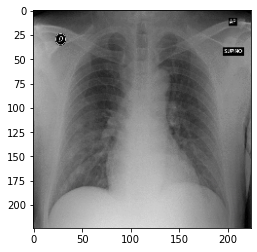

prediction = Covid
folder= covid


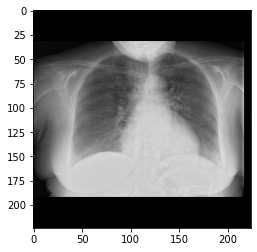

prediction = Covid
folder= covid


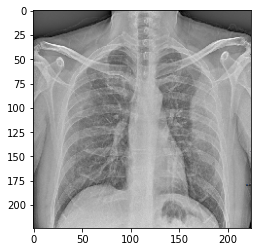

prediction = Covid
folder= covid


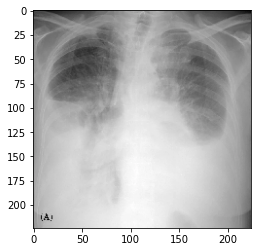

prediction = Normal
folder= normal


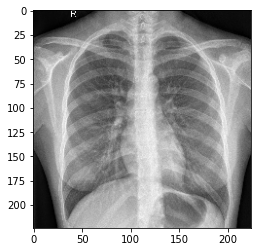

prediction = Normal
folder= normal


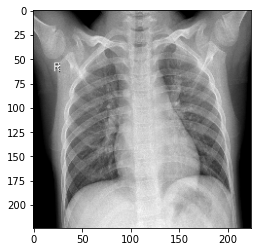

prediction = Normal
folder= normal


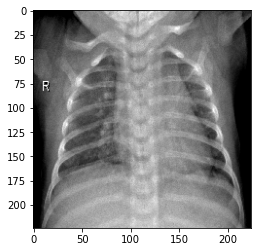

prediction = Pnumenia
folder= pnuemenia


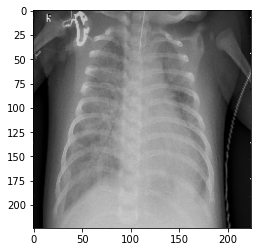

prediction = Pnumenia
folder= pnuemenia


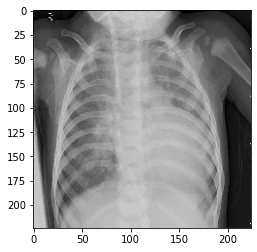

prediction = Pnumenia
folder= pnuemenia


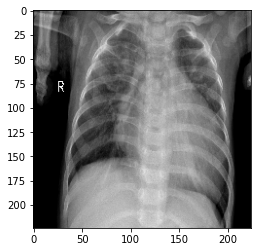

In [33]:
# making predictions on images the model was not trained on
# making predictions on images the model was not trained on

test = '../test_images/' # directory of test images

test_datagen = ImageDataGenerator( rescale=1.0/255 )  # preparing the test data as we done with train and valdiation

test_generator = test_datagen.flow_from_directory(
                                              test , target_size=(224, 224),
                                              class_mode='categorical',shuffle=False)  
# to visualize the data in the generators
labels={0:'Covid' , 1:'Normal' , 2:'Pnumenia'}
# then feed the variable images into the predict func.
predicted_label = np.argmax(history.predict( test_generator ),axis=1)
pred= [labels[x] for x in predicted_label]

x_batch, y_batch = next(test_generator) 
for i in range (len(pred)):
    image = x_batch[i]
    plt.imshow(image)
    print('prediction =', pred[i])
    if y_batch[i][0] == 1: print('folder= covid')
    elif y_batch[i][1] == 1: print('folder= normal')
    #elif y_batch[i][2] == 1: print('folder= Nawwar')
    elif y_batch[i][2] == 1: print('folder= pnuemenia')
    plt.show()

     
    

# then feed the variable images into the predict func.

# test_generator.labels # will show you the labels coded
# test_generator.filepaths # will show you thr path of each file

prediction = Covid
folder= covid


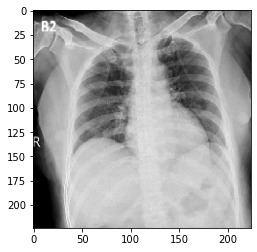

prediction = Covid
folder= covid


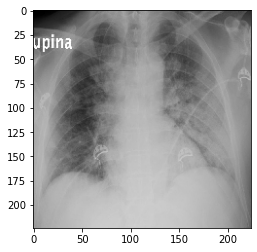

prediction = Covid
folder= covid


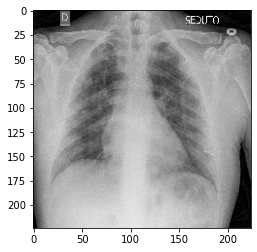

prediction = Covid
folder= covid


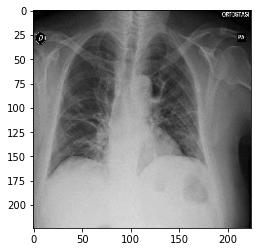

prediction = Covid
folder= covid


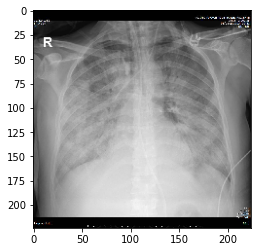

prediction = Covid
folder= covid


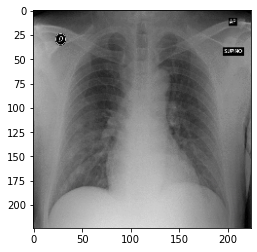

prediction = Covid
folder= covid


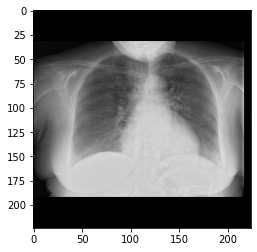

prediction = Covid
folder= covid


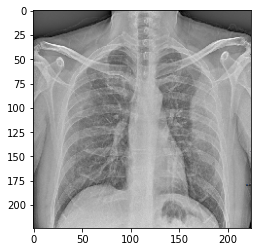

prediction = Covid
folder= covid


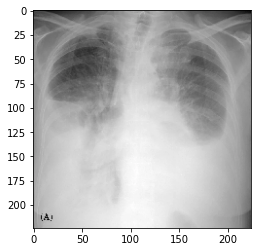

prediction = normal
folder= normal


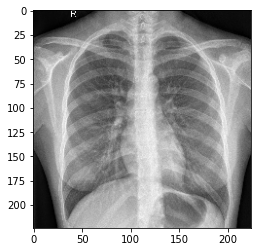

In [34]:
# another way to simplify mapping from labels to folder names

labels=['Covid','normal', 'nawar','pnumenia'] 
dic={}
for i in list(set(test_generator.labels)) :   # to set each class to the corresponding label
    dic[i] = labels[i]

predicted_label = np.argmax(history.predict( test_generator ),axis=1)    
pred= [dic[x] for x in predicted_label]

x_batch, y_batch = next(test_generator) 
for i in range (0,10):
    image = x_batch[i]
    plt.imshow(image)
    print('prediction =', pred[i])
    if y_batch[i][0] == 1: print('folder= covid')
    elif y_batch[i][1] == 1: print('folder= normal')
    #elif y_batch[i][2] == 1: print('folder= Nawwar')
    elif y_batch[i][2] == 1: print('folder= pnuemenia')
    plt.show()
    


In [38]:
# to create classification_report
from sklearn.metrics import classification_report
y_predict =np.argmax( history.predict(test_generator),axis=1)
print(classification_report(test_generator.labels , y_predict) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         3

    accuracy                           1.00        15
   macro avg       1.00      1.00      1.00        15
weighted avg       1.00      1.00      1.00        15



[[9 0 0]
 [0 3 0]
 [0 0 3]]


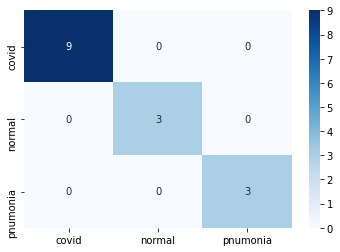

In [40]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import sklearn
y_predict =np.argmax( history.predict(test_generator),axis=1)
#tn, fp, fn, tp = np.max( confusion_matrix( test_generator.labels , y_predict ) , axis=1)
matrix=confusion_matrix(test_generator.labels , y_predict)
print(matrix)
# Confusion matrix Plotting
import seaborn as sns
classes=['covid', 'normal', 'pnumonia']
sns.heatmap(matrix, annot=True, xticklabels=classes, yticklabels=classes,cmap='Blues')#YlGnBu_r or Blues or twilight_shifted_r

In [36]:
# to get accuracy and loss
history.evaluate(test_generator)

1/1 [==============================] - 2s 2s/step - loss: 0.2144 - accuracy: 1.0000


[0.2143532931804657, 1.0]

In [42]:
# to get the f1 score only
from sklearn.metrics import f1_score

# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

F1Score = f1_score(test_generator.labels, y_predict, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)


F1 Score is :  1.0


In [56]:
 # to get the images out of generator
test_generator[0][0].shape  

(15, 224, 224, 3)

In [59]:
# To get the recall score only
from sklearn.metrics import recall_score
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)

RecallScore = recall_score(test_generator.labels, y_predict, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score(Sensitivity) is : ', RecallScore)


Recall Score(Sensitivity) is :  1.0


In [61]:
# To get the Percision score only
from sklearn.metrics import precision_score

PrecisionScore = precision_score(test_generator.labels, y_predict, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)


Precision Score is :  1.0


In [62]:
# another metric based abon f1 percision
rom sklearn.metrics import precision_recall_fscore_support 
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)

PrecisionRecallScore = precision_recall_fscore_support(test_generator.labels, y_predict, average='micro') #it can be : binary,macro,weighted,samples
a,b,c,d=PrecisionRecallScore
print('Precision Recall Score is : ', PrecisionRecallScore)


Precision Recall Score is :  (1.0, 1.0, 1.0, None)


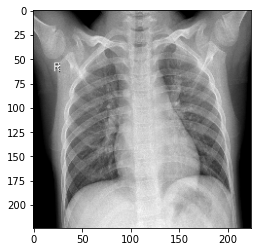

In [91]:
#1- importing the image function

from tensorflow.keras.preprocessing import image
#2- setting the path of the image

path='../Nawwar/NORMAL(108).JPG'
#3- uploading the image into a variable

img= image.load_img( path , target_size=( 224,224 ) )
# don't forget the target size the model is expecting
#4- processing the image variable to suit the model

x= image.img_to_array( img )
x= np.expand_dims( x , axis=0 )
images= np.vstack( [x] )
 
plt.imshow(img) # to show the image

In [98]:
# to predict the image
history.predict(x)

array([[3.5281887e-29, 1.0000000e+00, 0.0000000e+00]], dtype=float32)